In [31]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from itertools import groupby
import scipy
%matplotlib inline

In [4]:
series = [24.78, 22.55, 30.85, 23.88,
       27.78, 12.71, 25.25, 25.70, 
       34.44, 23.18, 29.81, 22.26, 
       22.97, 16.37, 22.82, 14.19, 
       16.40, 7.23, 13.05, 4.63, 
       3.19, 4.55, 0.94, 11.07]

In [5]:
time = [(x + 1) / len(series) for x in range(len(series))]

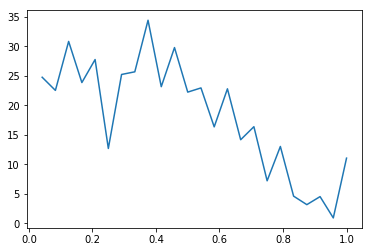

In [6]:
plt.plot(time,series)

In [7]:
M = np.mean(series)

In [8]:
M

18.358333333333334

In [9]:
V = np.var(series)

In [10]:
V

86.655272222222223

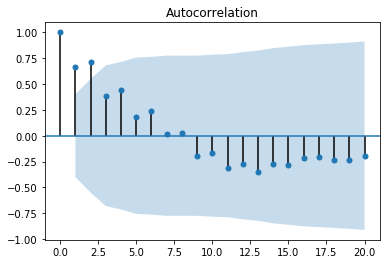

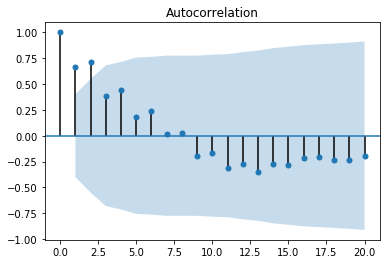

In [11]:
plot_acf(series,lags=20)

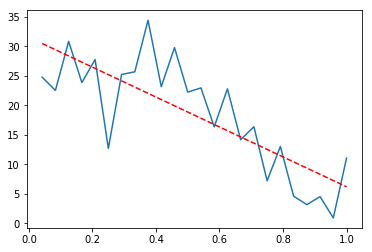

In [12]:
import numpy

plt.plot(time,series)

z = numpy.polyfit(time,series, 1)
p = numpy.poly1d(z) 
plt.plot(time,p(time),"r--")

plt.show()

Выоды:

1) С увеличением лага абсолютные значения коэффициента автокорреляции постепенно затухают. Но затухание не является абсолютным, поэтому ряд нельзя однозначно отнести к стационарным

2) Примерная оценка линии тренда ряда также выдает убывающий характер ряда

3) Ряд является "чередующимся" - низкие значения чередуются с выcокими через одну точку

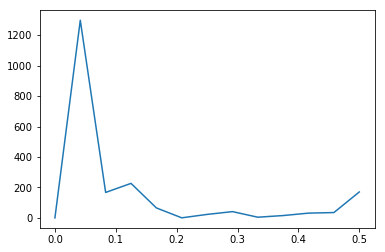

In [13]:
pds, pdden = signal.periodogram(series)
plt.plot(pds,pdden)

На периодограмме, так же, как и на графике АКФ, прослеживается склонность функции к затуханию 

При этом видно, что первые абсолютные значения периодограммы являются наибольшими, как и на АКФ

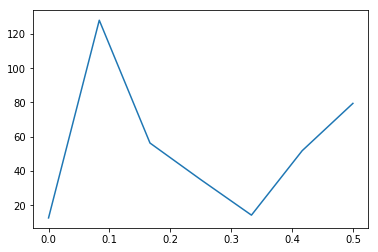

In [14]:
pdw, pddenw = signal.welch(series, nperseg = 12)
plt.plot(pdw, pddenw)

Оценка спектральной плотности мощности ряда, как и предшествующие оценки, показывает склонность функции к затуханию

В целом, график оценки спектральной плотности ряда по виду схож с видом периодограммы, с различием в области 0.1 - 0.2

### 8) Для работы Вам могут также пригодиться функции plt.subplot() и plt.semilogy(). Следует разобраться с их синтаксисом самостоятельно.

9) Проверить с помощью метода Ирвина ряд на аномальные
наблюдения. 

Для этого написать собственную функцию,
реализующую данный статистический тест, которая получает
исходный ВР и возвращает номера отсчетов, которые являются
аномальными. 

Для создания метода использовать выражения из
лекции 3 на страницах 13 и 14. Для N=24 принять значение
критического критерия равным 1.23 (a = 0.05) и 1.74 (a = 0.01).

In [15]:
def my_irwin_test(X,a = 0):
    k = np.subtract(X[1:],X[:-1])/np.std(X)
    
    if a == 0.05:
        return k < 1.23
    elif a == 0.01:
        return k < 1.74
    else:
        return k
    
irwin_test_005 = my_irwin_test(series,0.05)    
irwin_test_001 = my_irwin_test(series,0.01)

10) Указать найденные номера аномальных наблюдений. Построить график ВР и указать эти точки на изображении. Изображение добавить в отчет.

In [16]:
for i in range(len(irwin_test_005)):
    print(i+1,irwin_test_005[i])

1 True
2 True
3 True
4 True
5 True
6 False
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True
16 True
17 True
18 True
19 True
20 True
21 True
22 True
23 True


In [17]:
for i in range(len(irwin_test_001)):
    print(i+1,irwin_test_001[i])

1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True
16 True
17 True
18 True
19 True
20 True
21 True
22 True
23 True


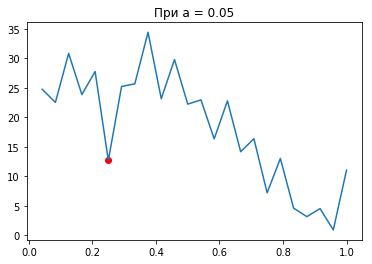

In [18]:
for i in range(len(irwin_test_005)):
    if irwin_test_005[i] == False:
        plt.scatter((i+1)/len(series),series[i],c='red')
plt.plot(np.array(time),np.array(series))
plt.title('При a = 0.05')

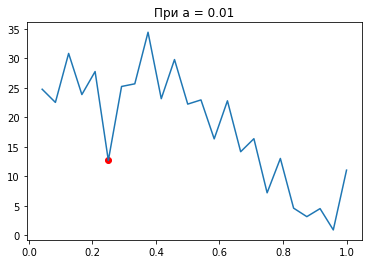

In [19]:
for i in range(len(irwin_test_001)):
    if irwin_test_005[i] == False:
        plt.scatter((i+1)/len(series),series[i],c='red')
plt.plot(np.array(time),np.array(series))
plt.title('При a = 0.01')

11) Доказать, что во ВР есть неслучайная составляющая с
помощью критерия серий (лекция 3, стр. 17). 

Построить функцию,которая бы производила расчет этого критерия для заданного ряда, с выводом результатов в виде конкретных предложений вида «гипотеза
о неизменности среднего значения ВР отвергается с вероятностью
ошибки альфа» или «принятие альтернативной гипотезы о
неслучайной составляющей ряда» и т.п. 

Для этого используйте
функцию print('Строка для вывода'), чтобы выводить в командное
окно строки.

In [20]:
def get_median(X):
    
    N = len(X)
    
    X_sorted = sorted(X)
    
    if N % 2 == 0:
        
        return 0.5*(X_sorted[int(N/2)-1] + X_sorted[int(N/2)])
    
    else:
    
        return X_sorted[int(N+1)/2-1]

def get_tau(x):
    
    cnt = 1    
    cnt_max = 0
    
    for i in range(len(x)):  
        
        if i < len(x)-1:  
            
            if x[i] == x[i+1]:
                
                cnt = cnt + 1                    
                
            else:
                
                if cnt > cnt_max:
                    
                    cnt_max = cnt 
                    
                cnt = 1
        
        else: 
            break
            
    return cnt

def check_series(x,v,tau):
    
    n = len(x)
    
    if v > 0.5 * (n + 2 - 1.96 * (n - 1) **(1/2)) \
       and tau < 1.43 * np.log(n + 1):
        return True
    else:
        return False
    
def get_series_hypothesis(X):
    
    
    sequences =   [x for x in 
                    [1 if x < get_median(X) 
                     else (2 if x == get_median(X) else 0) 
                     for x in X 
                    ] 
                    if 1 == x or 0 == x
                   ]
    
    v = len([el for el, _ in groupby(sequences)])
    tau = get_tau(sequences)
    
    hypothesis = check_series(X,v,tau)
    
    if hypothesis:
        
        print('Гипотеза о неизменности среднего значения ВР отвергается с вероятностью ошибки альфа')
    
    else:
        
        print('Принятие альтернативной гипотезы о неслучайной составляющей ряда')
    

In [21]:
test

NameError: name 'test' is not defined

In [22]:
get_series_hypothesis(series)

Принятие альтернативной гипотезы о неслучайной составляющей ряда


12) Наконец, произвести оценку ВР на стационарность.

13) Сначала используйте известный KPSS-тест. Для этого есть
функция tsa.kpss(X), которая возвращает статистику теста kpss_stat, pзначение теста p_value, и другие полезные результаты (критические
значения на разных % и т.д.).

In [23]:
tsa.kpss(series)

C:\Users\Vanya\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.34488811467212399,
 0.1,
 9,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

p-value в данном случа равен 0.1, поэтому принимается нулевая гипотеза о тренд-стационарности ряда

In [25]:
get_fisher(series)

F_onewayResult(statistic=26.955623584969079, pvalue=3.3145750577329648e-05)

pvalue для критерия Фишера близок к нулю - дисперсии сравниваемых подвыборок разные

Проверить с помощью критерия Стьюдента две половинки
исходного временного ряда на соответствие мат. ожиданий (при
предположении о равных дисперсиях)

Для критерия Стьюдента надо написать собственную функцию, используя выражение (3.5) из лекции 3
, значение критического
параметра t(1-a, n1+n2-1) можно найти через функцию stats.t.ppf(1-a, N1+N2-1)

21) Сравнить полученный критерий Стьюдента с результатами
работы функции scipy.stats.ttest_ind(x, y)

22) Пояснить все полученные результаты.


In [28]:
n = len(series)
half_n = int(n/2)

series_1 = series[half_n:]
series_2 = series[:half_n]

In [35]:
def get_student(x):
    
    n = len(x)
    half_n = int(n/2)
    
    x1 = x[half_n:]
    x2 = x[:half_n]
    
    n1 = len(x1)
    n2 = len(x2)
    
    return ((np.mean(x1)-np.mean(x2))/((n1 - 1)*np.var(x1) + (n2 - 1)*np.var(x2))**(1/2)) \
            * ((n1*n2*(n1+n2-2))/(n1+n2))**(1/2)

In [36]:
get_student(series)

-5.4227423707904698

In [32]:
 scipy.stats.ttest_ind(series_1, series_2)

Ttest_indResult(statistic=-5.1918805441736682, pvalue=3.3145750577329742e-05)

In [37]:
stats.t.ppf(1-0.05, len(series_1)+len(series_2)-1)

1.7138715277470473

In [38]:
get_student(series) > stats.t.ppf(1-0.05, len(series_1)+len(series_2)-1)

False

Гипотеза о постоянстве мат. ожидания отклоняется с уровнем значимости 0.05